In [433]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [434]:
dataset = pd.read_csv('OnlineRetailData.csv')


#### **Q1.1. Preprocess and clean the dataset (Note: Make sure to document your preprocessing step): This step should include the following:**

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 


**Dealing with the missing NA data**

In [435]:

print(dataset.isna().sum())


CustomerID    0
Amount        0
Frequency     0
Recency       0
dtype: int64


In [436]:
print(dataset.head())
print(dataset.shape)

   CustomerID   Amount  Frequency  Recency
0     12346.0     0.00          2      325
1     12347.0  4310.00        182        1
2     12348.0  1797.24         31       74
3     12349.0  1757.55         73       18
4     12350.0   334.40         17      309
(4293, 4)


**Dealing with data inconsistency.**
- Checking duplicate rows

In [437]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# If df is not defined, define it using your actual dataset

# Check for duplicate rows
duplicate_rows = dataset.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("The dataset has duplicate rows.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("The dataset does not have any duplicate rows.")


The dataset does not have any duplicate rows.


#### **Dealing with the unnecessary data**

Here `CustomerID` feature seems to be an unnecessary feature. Following steps were taken in action to make sure that it is an unnecessary feature, and it's removal won't cause any impact.

>  - Check if `CustomerID` has duplicate values, in other meaning if `duplicate` is `False` that means `CustomerID`  feature has all `unique` values
>  - Scatter plot to observe the distribution of `CustomerID` among other features.
>  - Construct Correlation matrix to see the relationship between `CustomerID` and other features.
>  - Dropping `CustomerID` feature.

In [438]:
# Check for duplicate CustomerId values
duplicate_customer_ids =dataset['CustomerID'].duplicated()

# Count the number of duplicate CustomerIds
num_duplicates = duplicate_customer_ids.sum()

if num_duplicates > 0:
    print("The CustomerId column has duplicate values.")
    print("Number of duplicate CustomerIds:", num_duplicates)
else:
    print("The CustomerId column does not have any duplicate values. It means CustomerID  feature has all unique values.")

The CustomerId column does not have any duplicate values. It means CustomerID  feature has all unique values.


**Scatter plot to observe the distribution of `CustomerID` among other features.**

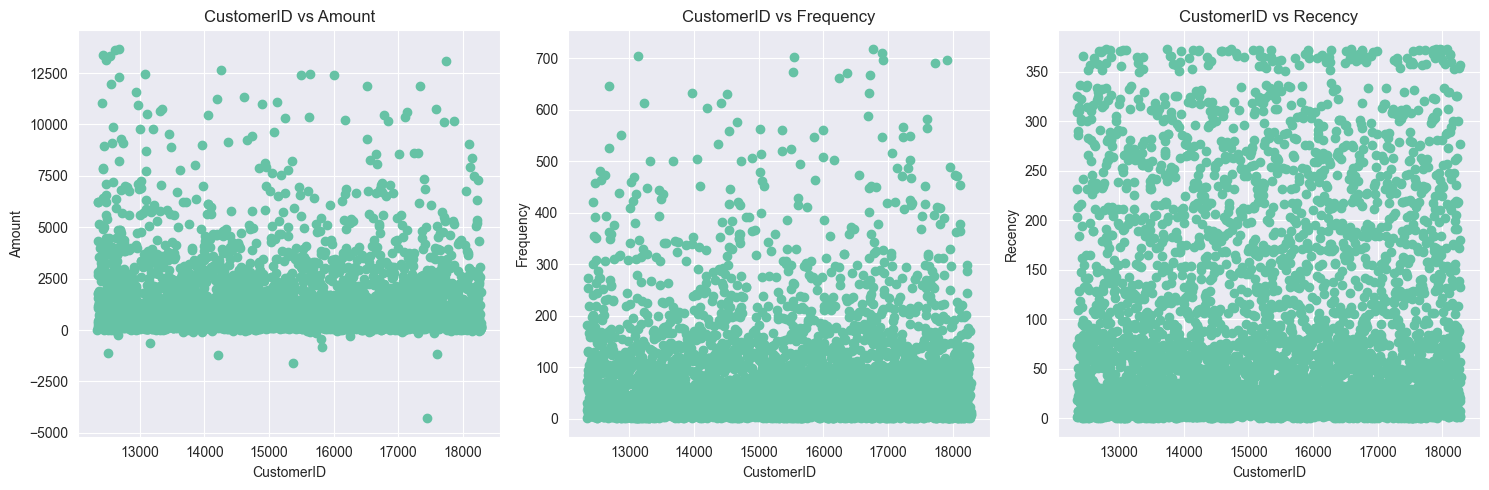

In [439]:
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the dataset
# If dataset is not defined, define it using your actual dataset

plt.figure(figsize=(15, 5))

# Define the features and titles
features = ['Amount', 'Frequency', 'Recency']
titles = ['CustomerID vs Amount', 'CustomerID vs Frequency', 'CustomerID vs Recency']

# Plot the scatter plots
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    plt.scatter(dataset['CustomerID'], dataset[feature])
    plt.xlabel('CustomerID')
    plt.ylabel(feature)
    plt.title(titles[i - 1])

plt.tight_layout()
plt.show()


**Construct Correlation matrix to see the relationship between `CustomerID` and other features.**

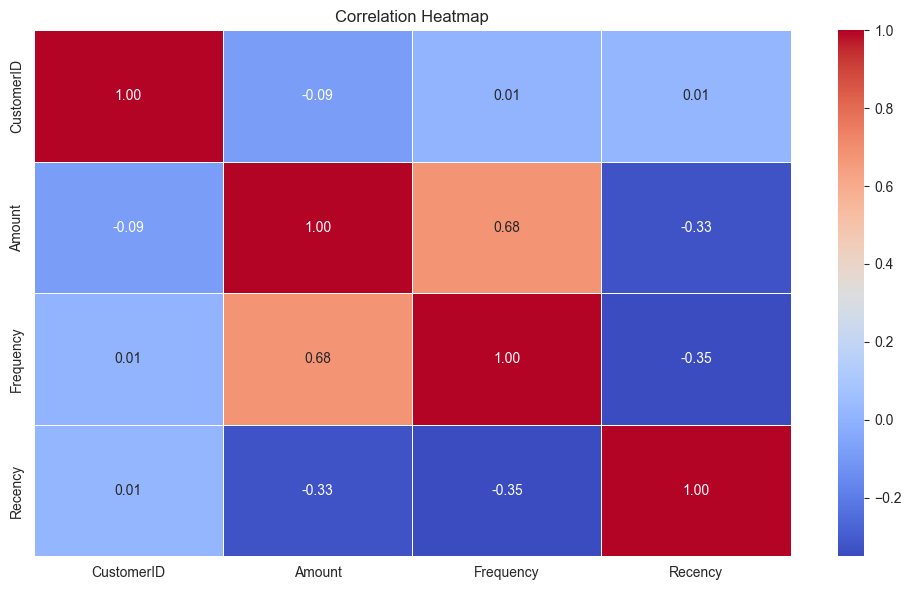

In [440]:
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Dropping `CustomerID` feature.** 
> - `CustomerID` has no significant correlation with other featutres. This can be visualized from all the figures above - Scatter plot and correlational matrix. Hence, it is dropped.

In [441]:
dataset.drop(columns=['CustomerID'],inplace=True)

**Dealing with the irregular data (outliers)**

> - Since K-means clustering is `sensitive` to outliers, as outliers tend to influence the `mean` value, hence, it is necessary to address the issue of the outlier in the case of K-means clustering. 

> - Here, outlier has been computed using the `zscore`, visualized using the `boxplot` and finally removed it, since the no. of outlier rows are comparitvely small with reference to the total instances of the dataset.

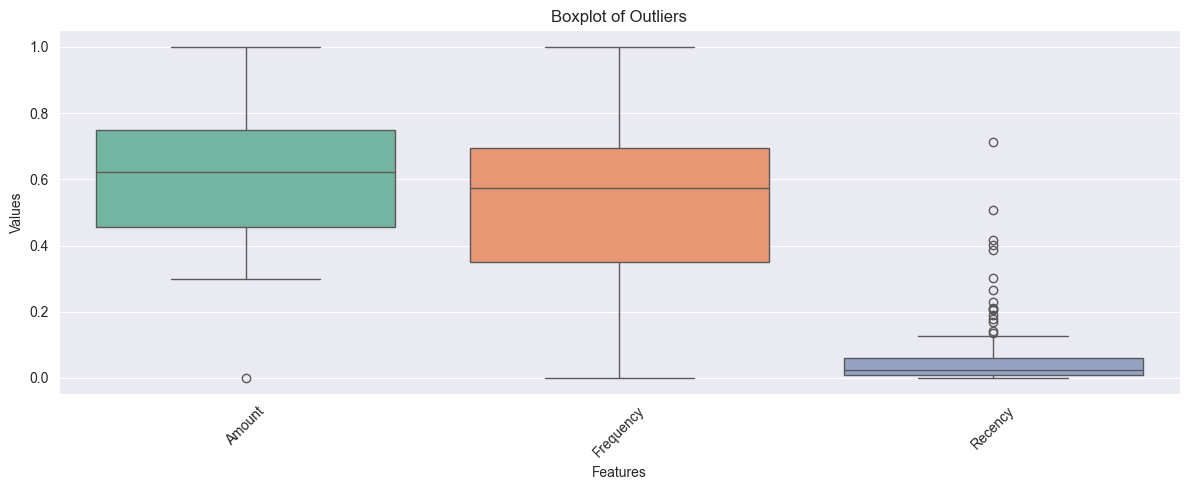

Outlier rows: 182


In [442]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# 1. Normalize dataset using MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# 2. Find outliers using scipy z score
z_scores = zscore(dataset_normalized)

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# 3. Visualize outliers using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset_normalized[outliers.any(axis=1)])
plt.title('Boxplot of Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# 4. Remove outliers and update the dataset
dataset_cleaned = dataset_normalized[~outliers.any(axis=1)]

print("Outlier rows:",dataset[outliers.any(axis=1)].shape[0])


# 5. Apply inverse_transform to inverse the normalization
dataset = pd.DataFrame(scaler.inverse_transform(dataset_cleaned), columns=dataset_cleaned.columns)


**Encoding categorical data**

Since all the features were numeric, encoding was not necessary.

#### **Q1.2. Visualize the dataset**
Following plots were constructed to visualize the dataset.
> - Correlation Matrix Heatmap of Features
> - Features Histogram
> - Features Scatterplot
> - Features Pairplot
> - Features 3D scatteplot

**Correlation matrix Heatmap of features.**

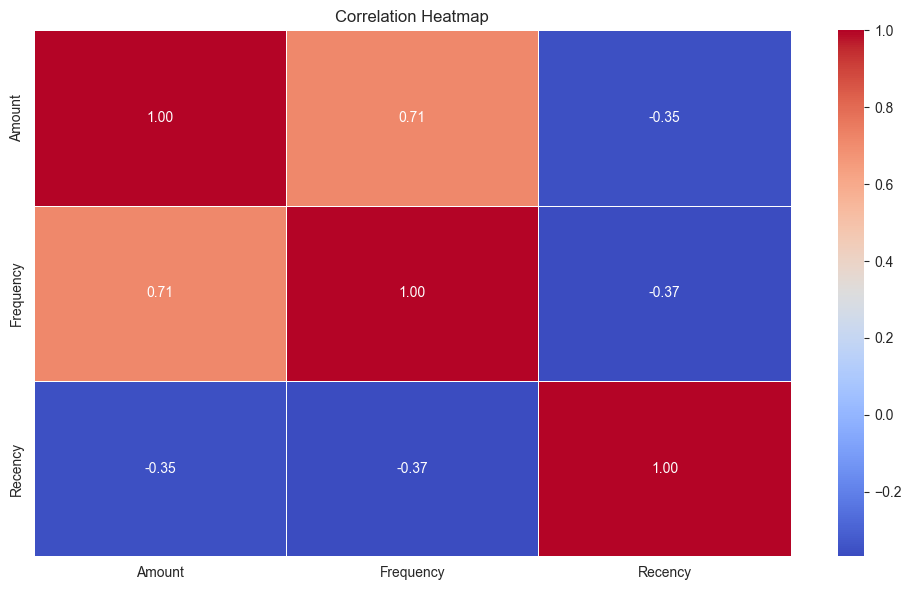

In [443]:
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Features Histogram**

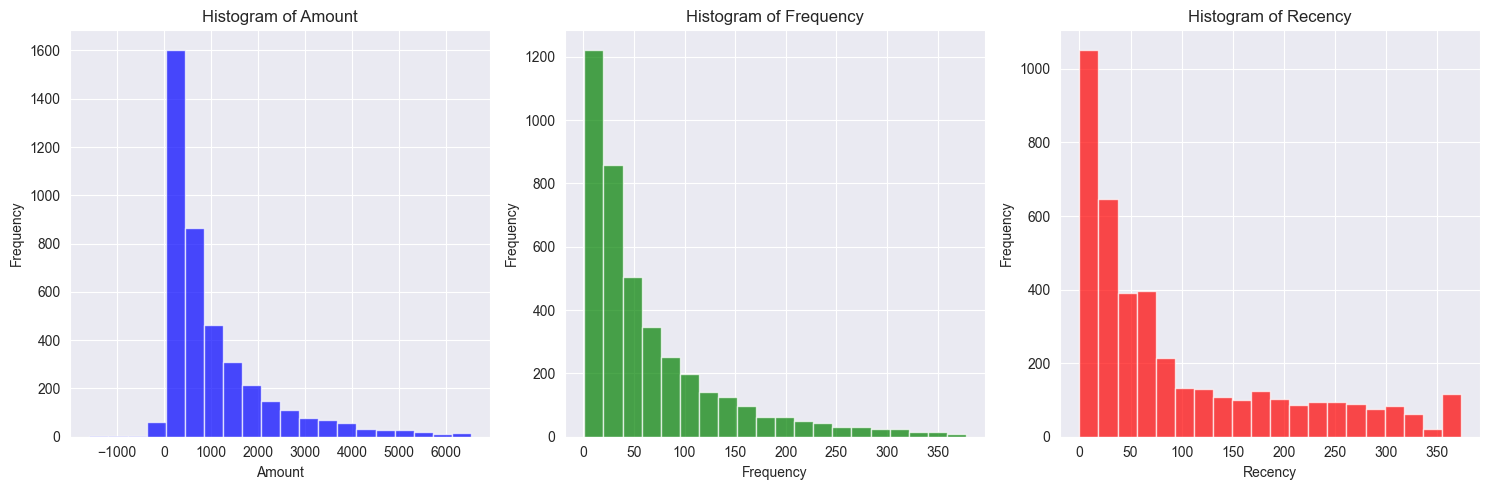

In [444]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the features Amount, Frequency, and Recency

# Plot histogram for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histogram for Amount
axes[0].hist(dataset['Amount'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Plot histogram for Frequency
axes[1].hist(dataset['Frequency'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histogram of Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Frequency')

# Plot histogram for Recency
axes[2].hist(dataset['Recency'], bins=20, color='red', alpha=0.7)
axes[2].set_title('Histogram of Recency')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Features Scatterplot**

<Axes: title={'center': 'Frequency Vs. Recency'}, xlabel='Frequency', ylabel='Recency'>

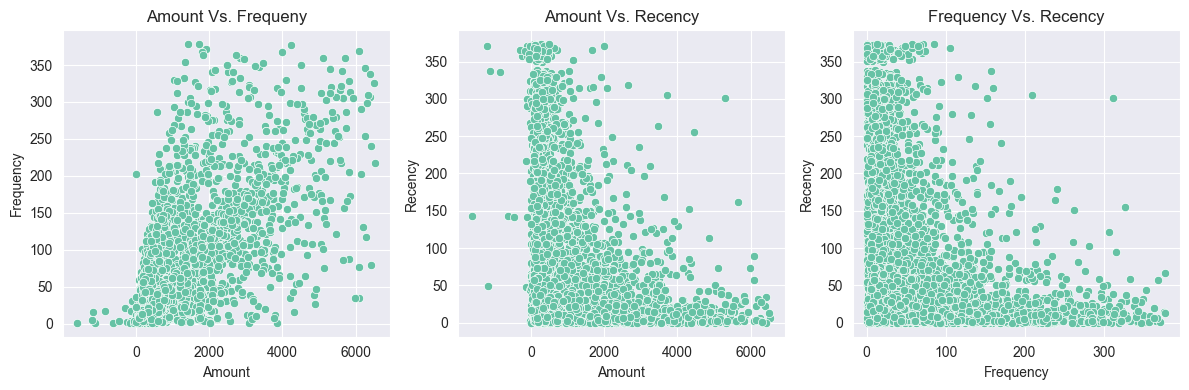

In [445]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Amount Vs. Frequeny")
sns.scatterplot(x="Amount", y="Frequency", data=dataset)

plt.subplot(1, 3, 2)
plt.title("Amount Vs. Recency")
sns.scatterplot(x="Amount", y="Recency", data=dataset)

plt.subplot(1, 3, 3)
plt.title("Frequency Vs. Recency")
sns.scatterplot(x="Frequency", y="Recency", data=dataset)

**Features Pairplot**

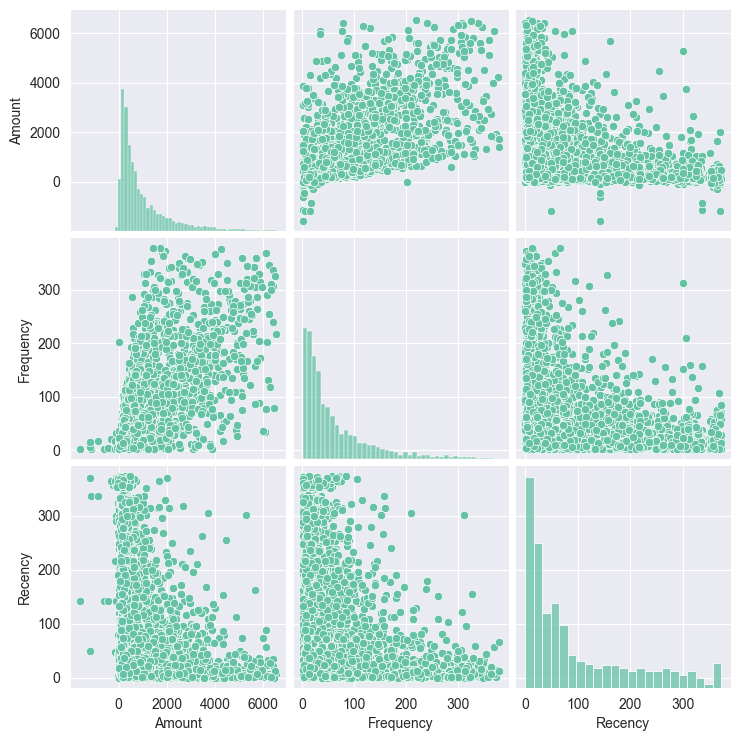

In [446]:
sns.pairplot(dataset)

**Performing Normalization**
>- `StandardScaler` is used to normalize the data points of the dataset.

In [447]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(4111, 3)

**Scatterplot of Features in 3D**

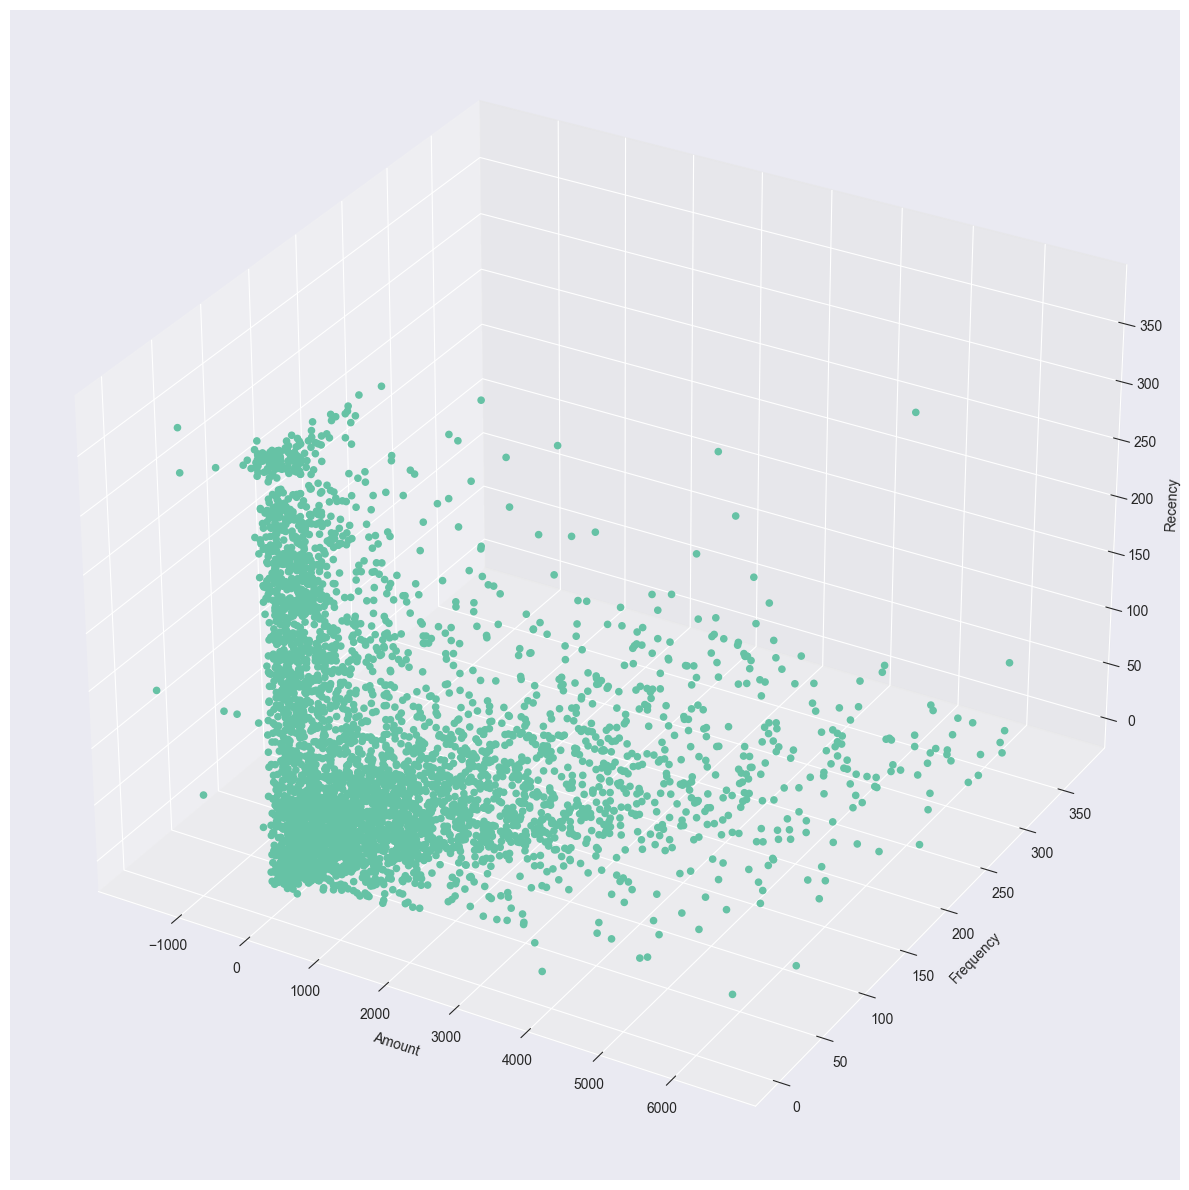

In [448]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2],alpha=1)
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()


### Selecting the best K (number of clusters)
<hr style="border:1px solid orange"> </hr>


#### **1. Inertia Analysis or Elbow Choice**

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variances, minimizing a criterion known as ***inertia***, or ***within-cluster sum-of-squares Inertia***, or the ***within-cluster sum of squares criterion***, 

***Inertia*** can be recognized as a measure of how internally coherent clusters are.

When plotting the inertia as a function of the number of clusters `K`, the curve often contains as inflexion point called the ***Elbow***. The fall where the Elbow is constructed, the respective point is taken as value of `K` as it to has the low inertia.

In [449]:
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    variations.append(kmeans.inertia_)

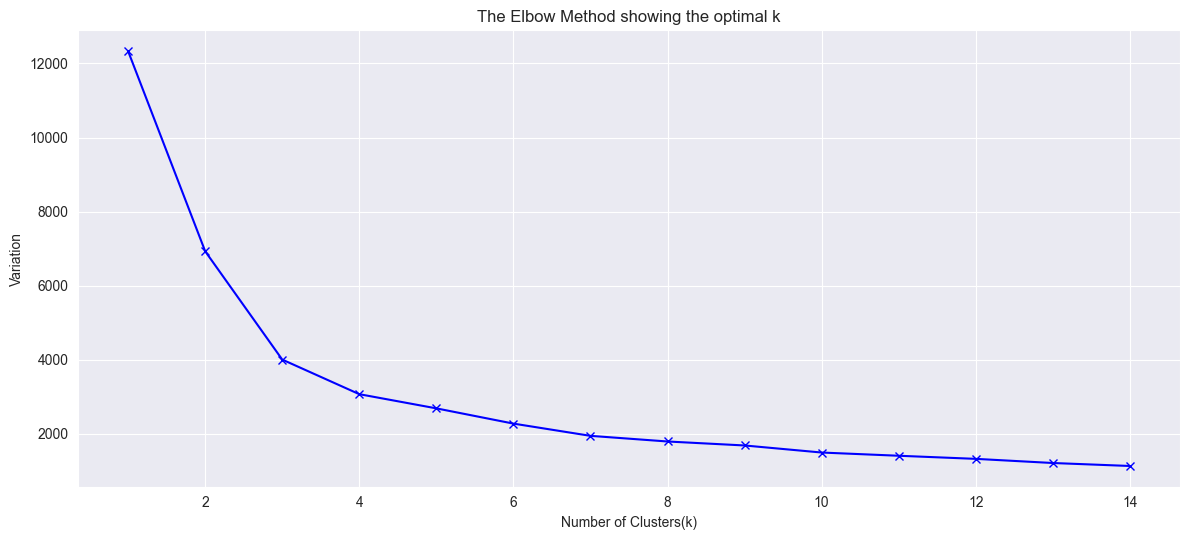

In [450]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### **2. Silhouette analysis**
A more precise approach (but also more computationally expensive)  is to use the `silhouette score`, which is the mean `silhouette coefficient` over all the instances. This can be implemented using Scikit-Learn's `silhouette_score()` function. The n_clusters value that can generate the highest silhouette score is selected as the value of `K`.

In [451]:

range_n_clusters = range(2,15)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("Optimal number of clusters = {}".format(optimal_num_clusters))
    



For n_clusters=2, the silhouette score is 0.47763501490560356
For n_clusters=3, the silhouette score is 0.47772210245295293
For n_clusters=4, the silhouette score is 0.35317624324395136
For n_clusters=5, the silhouette score is 0.3825086675626094
For n_clusters=6, the silhouette score is 0.38803807479028596
For n_clusters=7, the silhouette score is 0.37883279280356497
For n_clusters=8, the silhouette score is 0.34195018974745084
For n_clusters=9, the silhouette score is 0.31684142731683634
For n_clusters=10, the silhouette score is 0.3420362756206462
For n_clusters=11, the silhouette score is 0.34603137488412083
For n_clusters=12, the silhouette score is 0.33393787700162947
For n_clusters=13, the silhouette score is 0.3138031755205337
For n_clusters=14, the silhouette score is 0.3249445480956544
Optimal number of clusters = 3


#### **Q1.4. Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.**

In [452]:
kmeans = KMeans(n_clusters=optimal_num_clusters, max_iter=50)
kmeans.fit(dataset_scaled)
print(kmeans)

KMeans(max_iter=50, n_clusters=3)


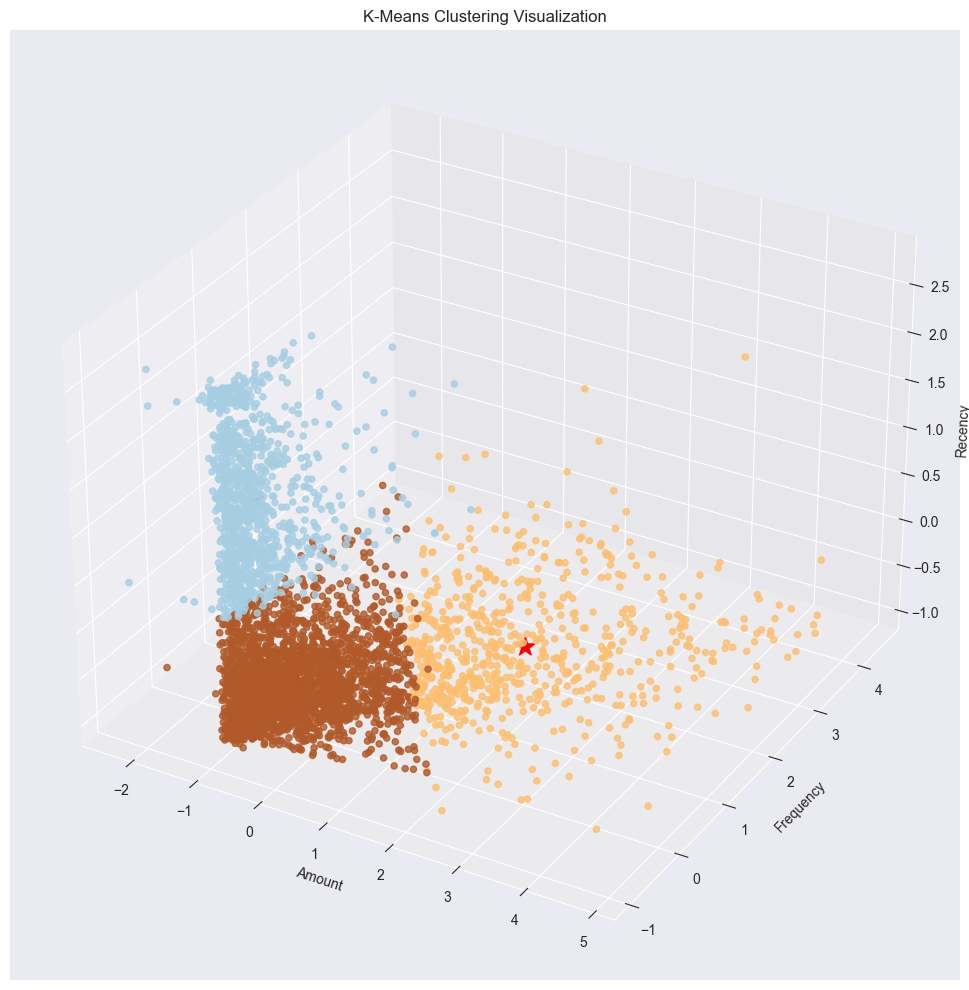

In [453]:

plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=kmeans.labels_, alpha=0.8, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('K-Means Clustering Visualization')
plt.show()



**Array of Labels for dataset instances generated from clustering.**

In [454]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2], dtype=int32)

In [455]:
dataset['km_clusters'] = kmeans.labels_

In [456]:
dataset.head()

,Amount,Frequency,Recency,km_clusters
0,0.00,2.0,325.0,0
1,4310.00,182.0,1.0,1
2,1797.24,31.0,74.0,2
3,1757.55,73.0,18.0,2
4,334.40,17.0,309.0,0


**Cluster Analysis of features**

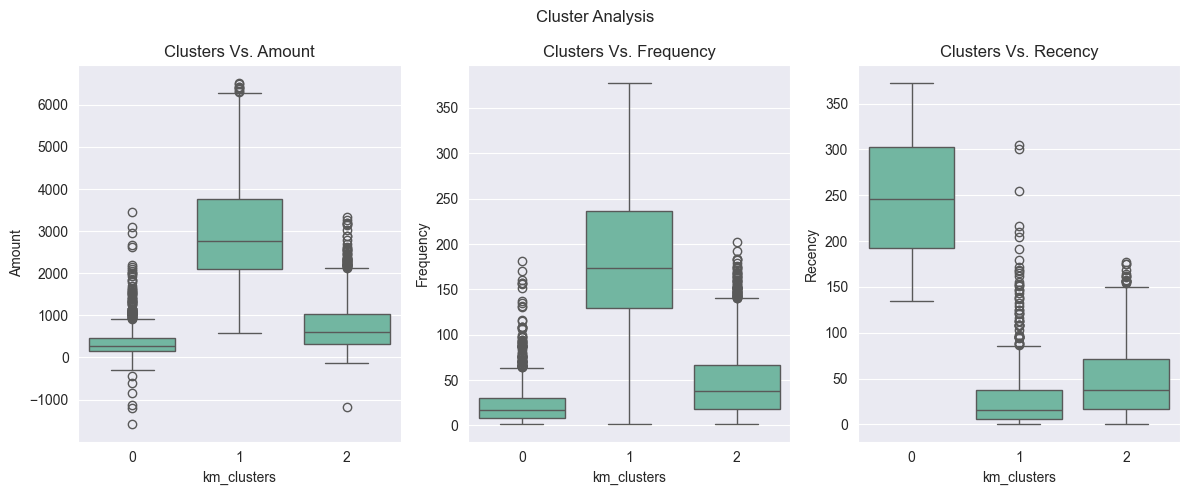

In [457]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Define the columns for which to create boxplots
columns = ['Amount', 'Frequency', 'Recency']

# Iterate over the columns and create boxplots
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='km_clusters', y=column, data=dataset)
    plt.title(f'Clusters Vs. {column}')

# Add a title for the entire plot
plt.suptitle('Cluster Analysis')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


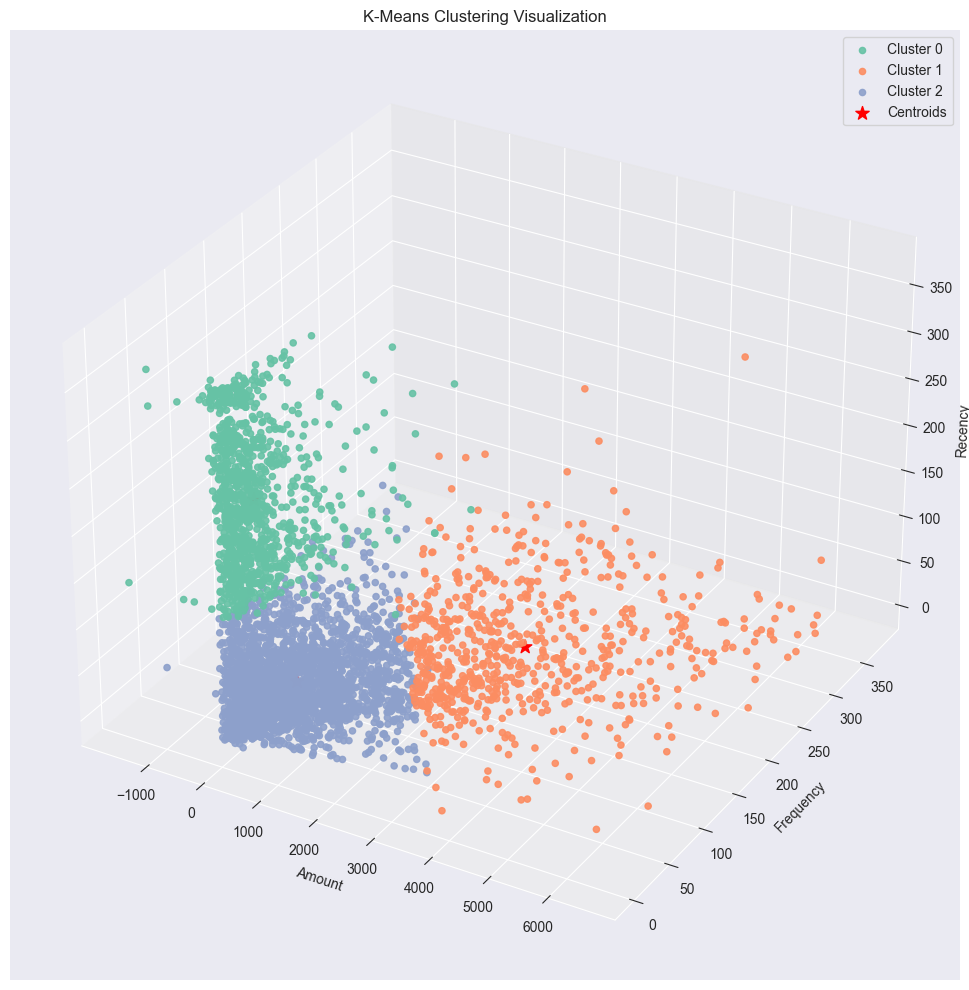

In [458]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming 'dataset' contains the dataset with columns: Amount, Frequency, Recency, km_clusters

# Create a new figure for the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with hue
for cluster in dataset['km_clusters'].unique():
    subset = dataset[dataset['km_clusters'] == cluster]
    ax.scatter(subset['Amount'], subset['Frequency'], subset['Recency'], label=f'Cluster {cluster}', alpha=0.9)

# Calculate centroids
centroids = dataset.groupby('km_clusters').mean()

# Plot centroids
ax.scatter(centroids['Amount'], centroids['Frequency'], centroids['Recency'], c='red', marker='*', alpha=1, s=100, label='Centroids')

# Add labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('K-Means Clustering Visualization')

# Add legend
ax.legend()

plt.show()


#### **Q1.5. Build a clustering model using a hierarchical clustering algorithm**
> - Building hierarchical clustering using linkage criteria  method as `average` (based on smallest average distance)
> - Building hierarchical clustering using linkage criteria  method as `complete` (based on smallest maximum distance)


**1. Linkage Criteria method  as `average`**

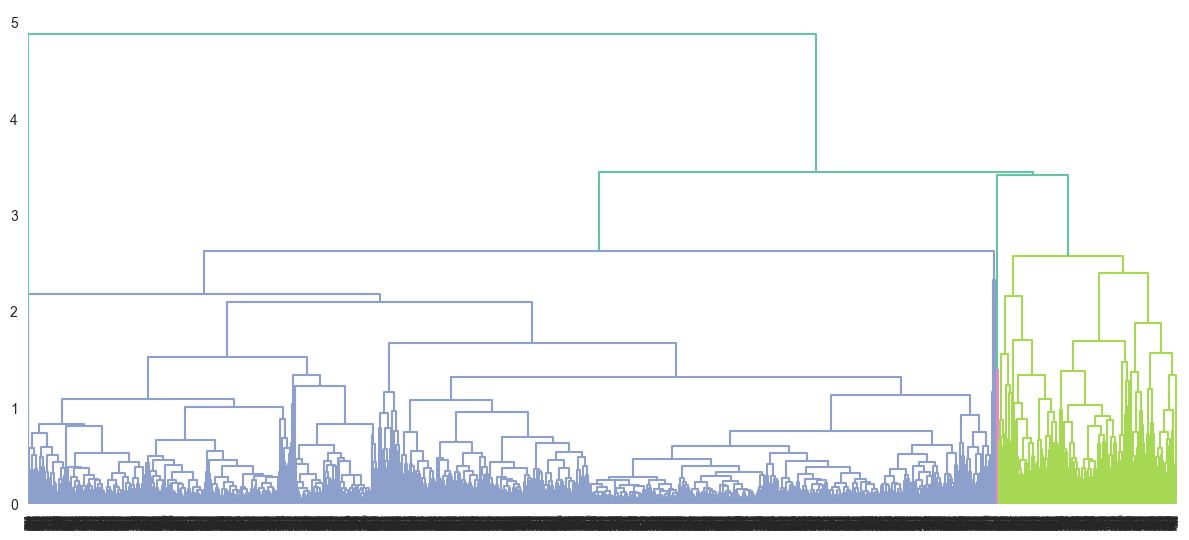

In [459]:
mergings = linkage(dataset_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

**Taking same no. of clusters as in k-means clustering. `n_clusters=optimal_num_clusters`**

In [460]:
cluster_labels = cut_tree(mergings, n_clusters=optimal_num_clusters).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [461]:
dataset['h_clusters_average'] = cluster_labels
dataset.head()
dataset.drop(columns=['km_clusters'], inplace=True)

#### **Cluster Visualization with their respective labeling**

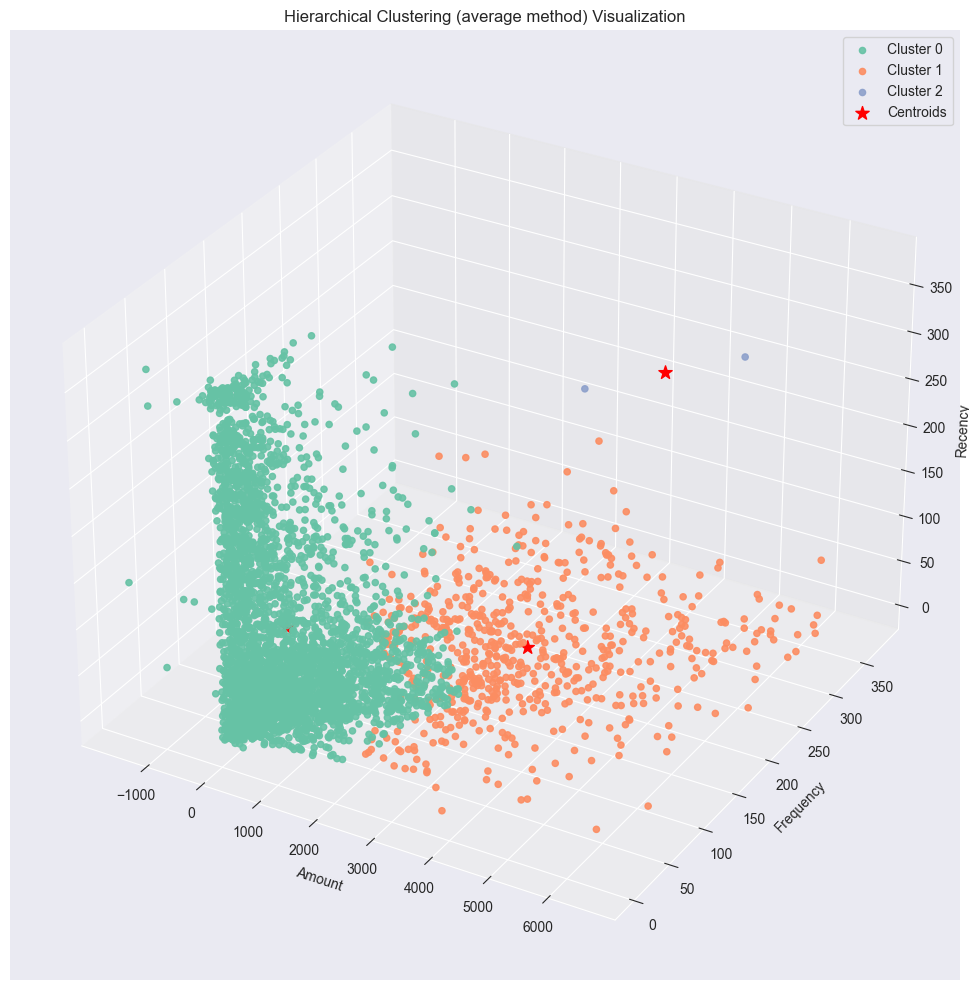

In [462]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



# Create a new figure for the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with hue
for cluster in dataset['h_clusters_average'].unique():
    subset = dataset[dataset['h_clusters_average'] == cluster]
    ax.scatter(subset['Amount'], subset['Frequency'], subset['Recency'], label=f'Cluster {cluster}', alpha=0.9)

# Calculate centroids
centroids = dataset.groupby('h_clusters_average').mean()

# Plot centroids
ax.scatter(centroids['Amount'], centroids['Frequency'], centroids['Recency'], c='red', marker='*', alpha=1, s=100, label='Centroids')

# Add labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('Hierarchical Clustering (average method) Visualization')

# Add legend
ax.legend()

plt.show()


#### **Cluster Anlaysis**

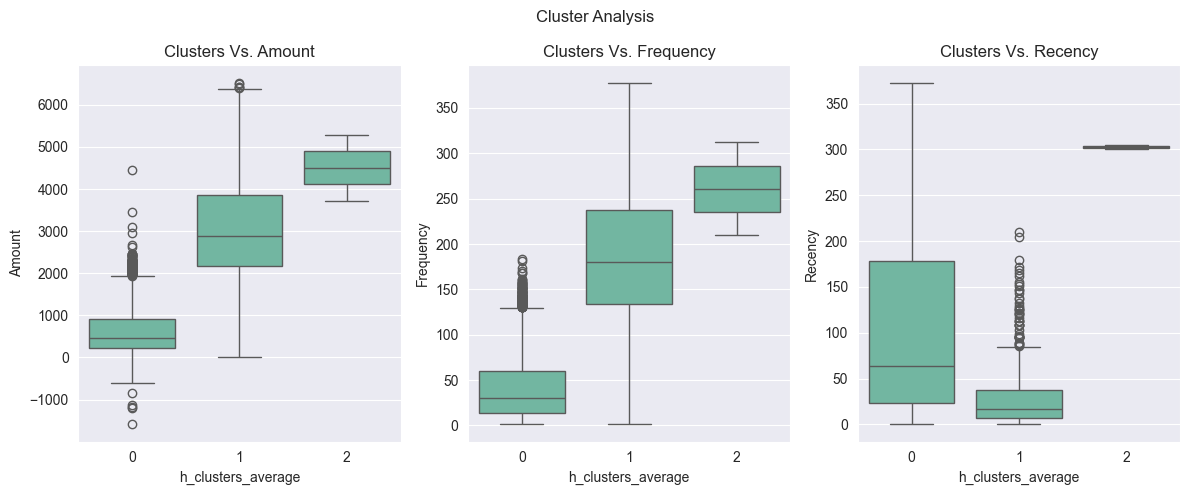

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Define the columns for which to create boxplots
columns = ['Amount', 'Frequency', 'Recency']

# Iterate over the columns and create boxplots
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='h_clusters_average', y=column, data=dataset)
    plt.title(f'Clusters Vs. {column}')

# Add a title for the entire plot
plt.suptitle('Cluster Analysis')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**2. Linkage Criteria method  as `complete`**

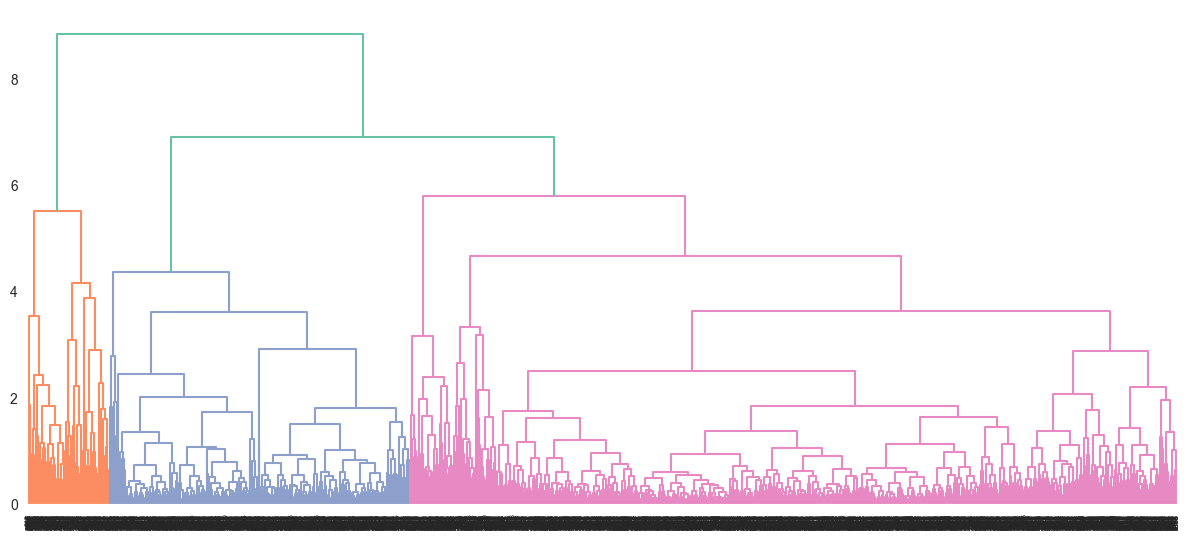

In [464]:
mergings = linkage(dataset_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Taking same no. of clusters as in k-means clustering. `n_clusters=optimal_num_clusters`**

In [465]:
cluster_labels = cut_tree(mergings, n_clusters=optimal_num_clusters).reshape(-1, )
dataset['h_clusters_complete'] = cluster_labels
dataset.drop(columns=['h_clusters_average'], inplace=True)
print(dataset.head())

    Amount  Frequency  Recency  h_clusters_complete
0     0.00        2.0    325.0                    0
1  4310.00      182.0      1.0                    1
2  1797.24       31.0     74.0                    2
3  1757.55       73.0     18.0                    2
4   334.40       17.0    309.0                    0


#### **Cluster Analysis**

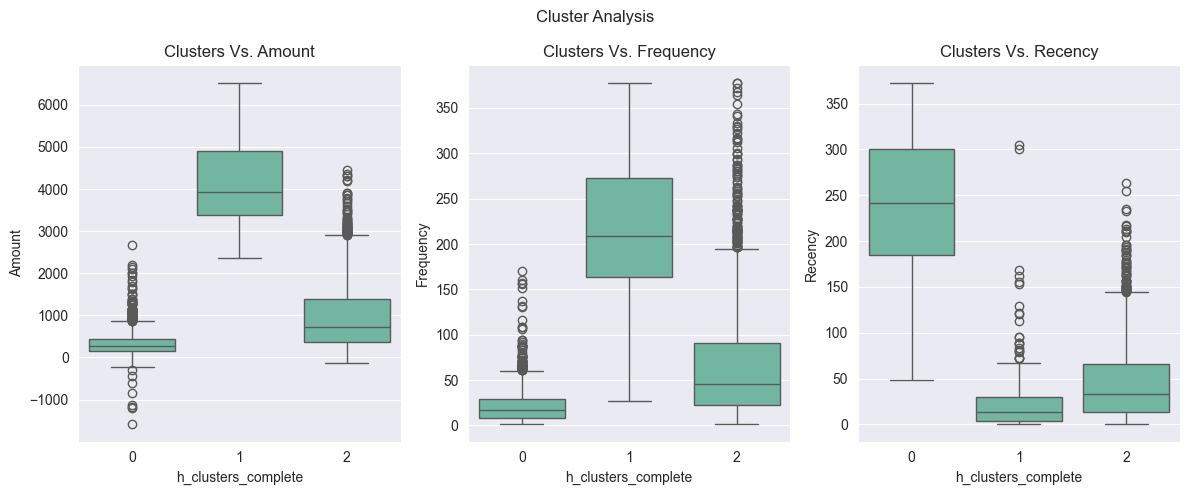

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Define the columns for which to create boxplots
columns = ['Amount', 'Frequency', 'Recency']

# Iterate over the columns and create boxplots
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='h_clusters_complete', y=column, data=dataset)
    plt.title(f'Clusters Vs. {column}')

# Add a title for the entire plot
plt.suptitle('Cluster Analysis')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### **Cluster Visualization with their respective labeling**

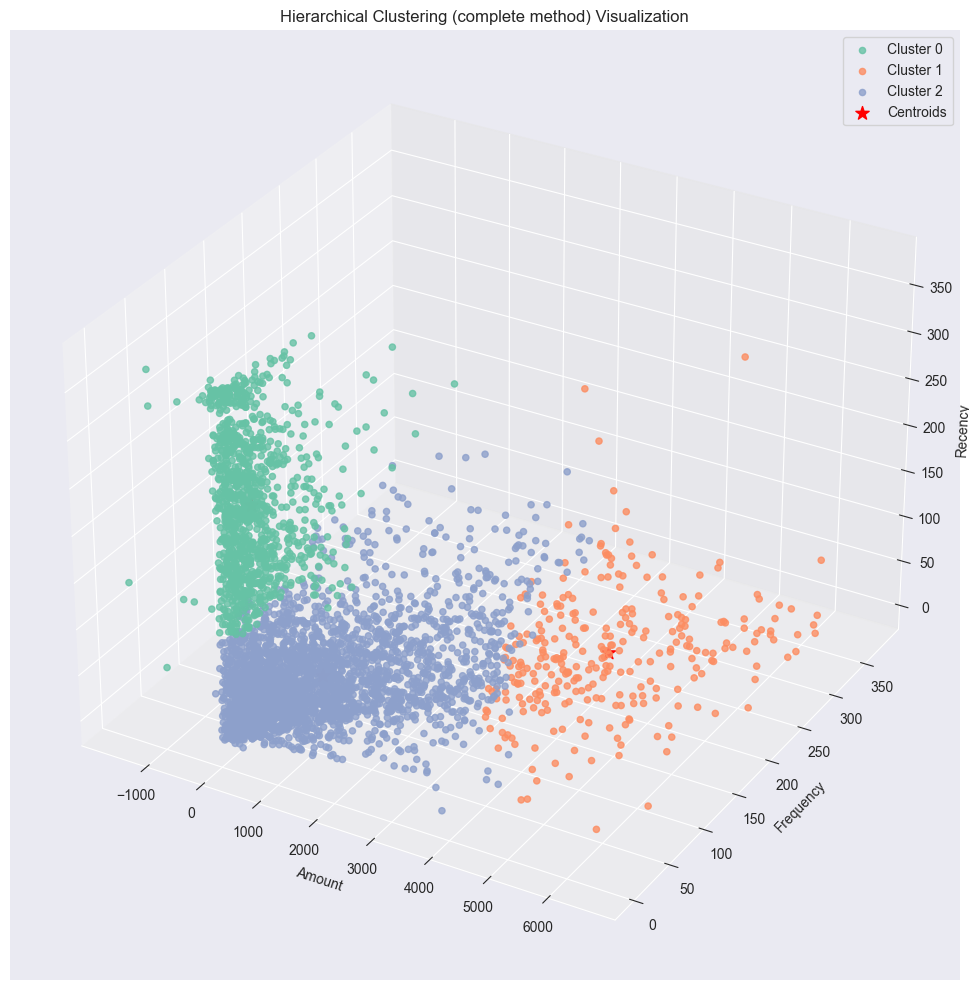

In [467]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming 'dataset' contains the dataset with columns: Amount, Frequency, Recency, km_clusters

# Create a new figure for the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with hue
for cluster in dataset['h_clusters_complete'].unique():
    subset = dataset[dataset['h_clusters_complete'] == cluster]
    ax.scatter(subset['Amount'], subset['Frequency'], subset['Recency'], label=f'Cluster {cluster}', alpha=0.8)

# Calculate centroids
centroids = dataset.groupby('h_clusters_complete').mean()

# Plot centroids
ax.scatter(centroids['Amount'], centroids['Frequency'], centroids['Recency'], c='red', marker='*', alpha=1, s=100, label='Centroids')

# Add labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.title('Hierarchical Clustering (complete method) Visualization')

# Add legend
ax.legend()

plt.show()


#### **Q1.6. Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster.**

The study of `K-means clustering` and `Hierarchical clustering` describes the orientation of several features associated with the customers.
> - **Analysis of K-Means Clustering:**
>  The diagram from K-Means clustering provides insights on customer segmentation based on amount, frequency, and the recency behavior. We can see the formation of three clusters of the customer.
> - **Cluster 0:** Cluster 0 has the lowest amount value along with the amount in negative, which might be the cluster of customers who are using some sort of discount or who owe the company money. Similarly, those customers have high recency values and low frequency. This cluster indicates the customers who are less frequent, and who are purchasing with some offers or discounts with low transaction amounts. This cluster of customers may not benefit the company.
> - **Cluster 1:** Cluster 1 has the customer with transaction amount wide populated between 0 to 6000. Moreover, the frequency is also widely spread, and has low recency values. The high frequency and low recency represent their active purchasing behavior. This cluster represents the most active group of customers who are benefiting the company.
>  - **Cluster 2:** Cluster 2 represents the group of customers with medium active buying history. The transaction amount spread is up to 3000, and has a few frequencies in comparison to cluster 1. They also possess smaller recency in comparison to cluster 0. The customers in this cluster are high in density, meaning most of the customers are of the medium purchase history category.

> - **Analysis of Hierarchical Clustering (Linkage criteria - average):**
> - **Cluster 0:** Cluster 0 has densely populated data points representing the customers who have a purchasing behavior of the lowest amount value  Similarly, those customers have high recency values and low frequency.  The customer frequency is highly populated between 0 and 250. This cluster indicates the customers with medium frequent buying behavior in a larger time gap than cluster 1. 
> - **Cluster 1:** Cluster 1 has the customer with transaction amount wide populated between 0 to 6000. Moreover, the frequency is also widely spread, and has low recency values. The high frequency and low recency represent their active purchasing behavior. This cluster represents the most active group of customers who are benefiting the company. 
>  - **Cluster 2:** Cluster 2 represents the group of customers with very high recency but with high frequency. The customers in this cluster shop frequently but in greater time gap. The no of such customers is very low.

> - **Analysis of Hierarchical Clustering (Linkage criteria - complete):**
>   The diagram exhibits the similar cluster as that of K-Means clustering.
> - **Cluster 0:** Cluster 0 represents the group of customers that have a low amount of buying history. These customers also tend to buy things frequently but after a long period. Similarly, those customers have high recency values and medium frequency.  The customer frequency is highly populated between 0 and 250. 
> - **Cluster 1:** Cluster 1 has the customer with transaction amount wide populated between 2000 to 6000. Moreover, the frequency is also widely spread and has low recency values. The high frequency and low recency represent their active purchasing behavior. This cluster represents the most active group of customers who are benefiting the company. 
>  - **Cluster 2:** Cluster 2 represents the group of customers with low receny but medium frequency. The customers in this cluster shop frequently but in smaller periods. However, they tend to purchase the item with a low cost amount(below 4000).


> **From both the K-means and the hierarchical clustering it can be seen that cluster 1 (orange) has a good buying history ( more frequent, greater amount, less recency) and such customers can benefit the company.**


#### **More on Evaluating between `K-mean`, `Agglomerative` and `DBSCAN` using `unsupervised  silhouette score`** 
> - Since we do not have the ground truth we cannot use the `supervised ARI score method` for evaluation. Hence, this evaluation is performed without the ground truth.  Although we have some comparative scores as measures for DBSCAN, the measure is not efficient as `Unsupervised silhouette score` method cannot address the density-based clustering score measure. `Unsupervised silhouette score` is more robust towards the convex- influenced clustering.
> - In case of `K-means` and A`gglomerative`, we can see `K-means` have better cluster orientation in comparison to `Agglomerative`.

#### **`CODE BELOW`**

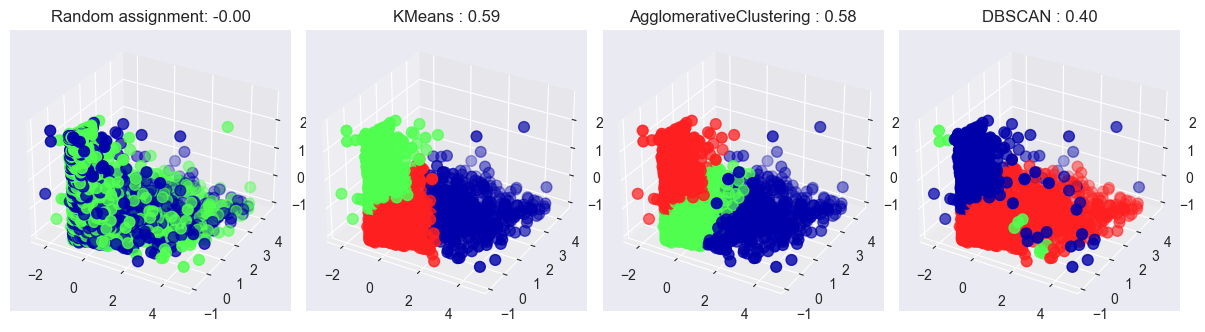

In [468]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
import mglearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns 

# Read the dataset with three features
X = pd.read_csv('OnlineRetailData.csv')

X = dataset

# # Define the length of the array
length = len(X)

# # Generate a random array of integers between 0 and 2 with length equal to the number of samples
y = np.random.randint(2, size=length)

# # Rescale the data to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Create a figure with 4 subplots
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 4,subplot_kw={'projection': '3d'})

# Make a list of algorithms to use
algorithms = [KMeans(n_clusters=optimal_num_clusters), AgglomerativeClustering(n_clusters=optimal_num_clusters), DBSCAN(eps=0.5,min_samples=3)]

# Create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=length)

# Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

# Iterate over each algorithm and plot its clusters
for ax, algorithm in zip(axes[1:], algorithms):
    # Fit the algorithm and predict clusters
    clusters = algorithm.fit_predict(X_scaled)
    
    # Plot the clusters in 3D
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters,
                cmap=mglearn.cm3, s=60)
    
    # Set title with algorithm name and ARI score
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()



<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**1. A reflection of your experience performing the activity.**

This clustering lab experience helped me gain insights into the working principles of clustering algorithms and their practical applications. I learned how different clustering algorithms, such as `K-means`, `Agglomerative`, and `DBSCAN`, can be useful for different types of datasets and use cases. Additionally, I acquired knowledge of methods for choosing the optimal number of clusters, such as `silhouette` analysis and the  `inertia/elbow` method. Overall, this activity enhanced my understanding of clustering techniques and their importance in data analysis and interpretation.

**2. A reflection on the importance of learning this activity.**
   
I learned about the significance of clustering in analyzing unlabeled data and its relevance to `semi-supervised learning`. Understanding clustering algorithms provides valuable insights into how data can be grouped into meaningful clusters based on similarities. Moreover, I gained knowledge about various methodologies used to evaluate clustering algorithms, such as ` supervised-Adjusted Rand Index (ARI) score` and `unsupervised silhouette` methods. These evaluation techniques help in assessing the effectiveness and performance of clustering algorithms, allowing for informed decisions in data analysis and interpretation.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab4.ipynb** to the **Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                          | Good                                               | Average                                                    | Below Average                                               | Poor                                                         | No Attempt                                                  |
| ----------------------------------------- | --------------------------------------------------- | --------------------------------------------------- | ---------------------------------------------------------- | ----------------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.2         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.3         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.4         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.5         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.6         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection                     |
